<a href="https://colab.research.google.com/github/thayanneramires/analise_catalogo_netflix/blob/main/analise_catalogo_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do catálogo de filmes e séries da Netflix

### Problema: Como evoluiu a diversidade e o volume de títulos adicionados à Netflix nos últimos anos?

## Sobre o conjunto de dados

A Netflix é uma das plataformas de streaming mais populares do mundo, com mais de 200 milhões de assinantes em meados de 2021 e um catálogo vasto de mais de 8.000 filmes e séries. Este conjunto de dados oferece uma visão detalhada desse conteúdo. Ele contém informações cruciais sobre cada título, como quem o dirigiu, quando foi adicionado à plataforma, e de qual país ele é, entre outros detalhes relevantes.

Link do dataset no Kaggle: Netflix Movies and TV Shows [https://www.kaggle.com/datasets/shivamb/netflix-shows]

## Carregando bibliotecas

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Carregando Dados

In [5]:
caminho = "/content/netflix_titles.csv"

In [6]:
df = pd.read_csv(caminho, sep=",", decimal = '.')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# Covertendo 'date_added' para formato datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Removendo linhas com NaT (Not a Time) após a conversão:
df.dropna(subset=['date_added'], inplace=True)

# Extração do ano de adição
df['year_added'] = df['date_added'].dt.year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


## Exploração de dados

### Quantidade de títulos adicionados por ano (Gráfico de Linha com Tendência)

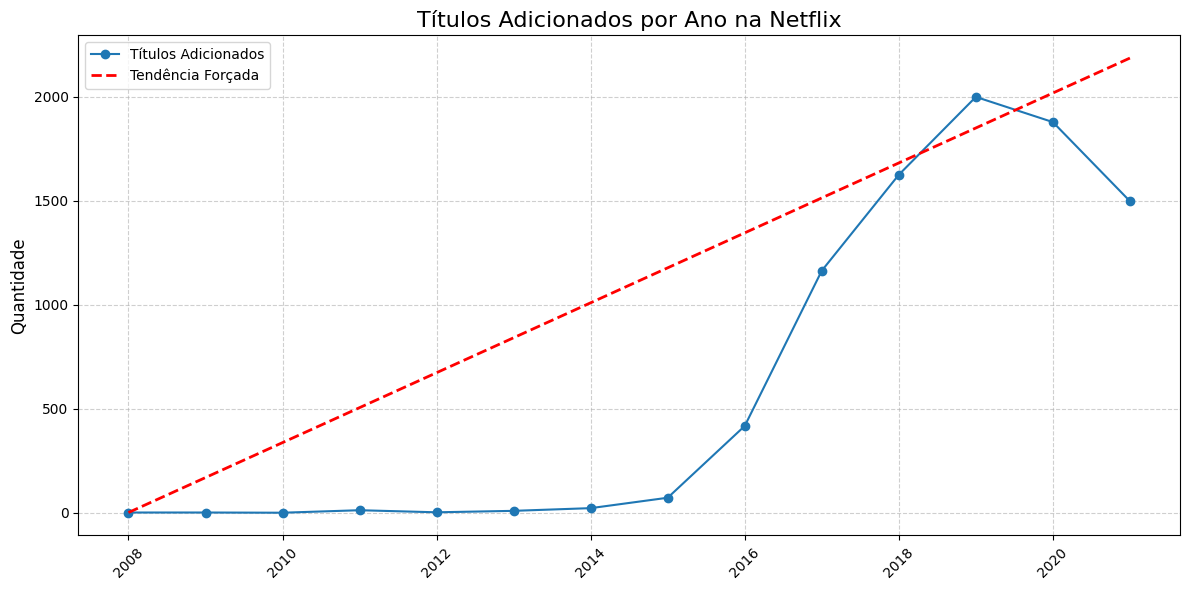

In [8]:
# Contando o número de títulos por ano
titles_per_year = df['year_added'].value_counts().sort_index()
titles_per_year = titles_per_year[titles_per_year > 0]

x = np.arange(len(titles_per_year))
y = titles_per_year.values

# Inclinação da tendência
slope, _ = np.polyfit(x, y, 1)

# Forçando interceptação no primeiro valor (ano inicial)
intercept = y[0]
trend_line = intercept + slope * (x - x[0])  # deslocamento

# Gráfico
plt.figure(figsize=(12, 6))
plt.title('Títulos Adicionados por Ano na Netflix', fontsize=16)
plt.ylabel('Quantidade', fontsize=12)

plt.plot(titles_per_year.index, y, marker='o', label='Títulos Adicionados')
plt.plot(titles_per_year.index, trend_line, color='red', linestyle='--', linewidth=2, label='Tendência Forçada')

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


A linha de tendência sugere um crescimento constante e linear ao longo dos anos. No entanto, a linha azul com os dados reais de títulos adicionados conta uma história muito diferente. O padrão real pode ser dividido em três fases distintas:
* Início Lento (2008-2015)
* Crescimento Explosivo (2016-2019)
* Pico e Reajuste (Pós-2019)

### Evolução de Títulos e Países por Ano (Gráfico com 2 Eixos)

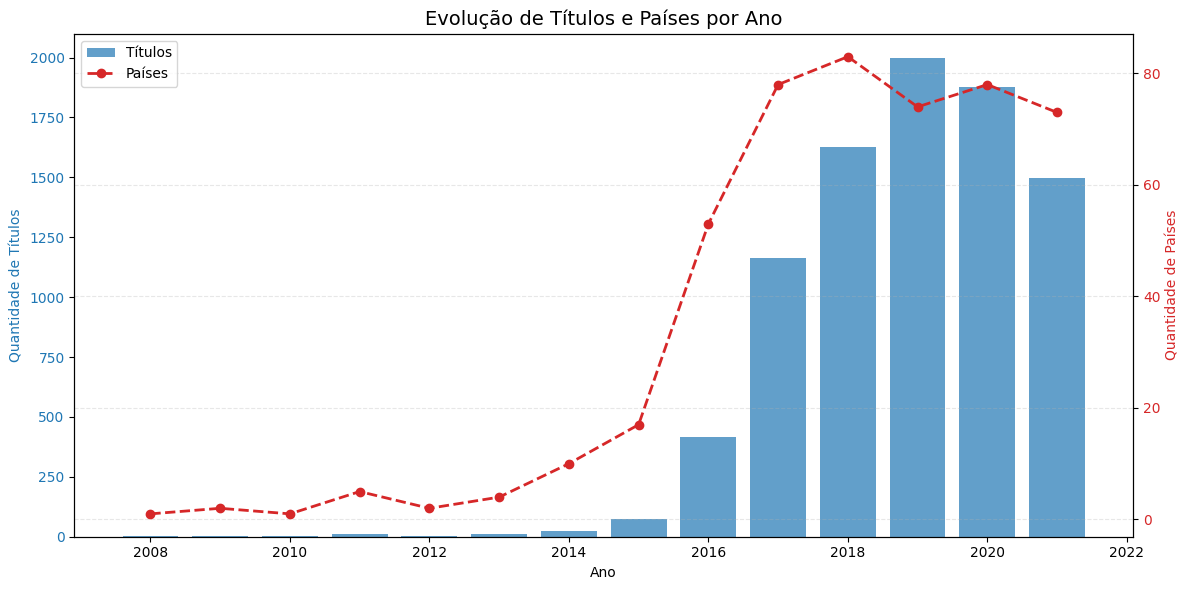

In [9]:
# Títulos por ano
titulos_por_ano = df['year_added'].value_counts().sort_index()
titulos_por_ano = titulos_por_ano[titulos_por_ano.index > 0]

# Diversidade de países
df['country'] = df['country'].fillna('Unknown')

def contar_paises_unicos(grupo):
    return len(set(p.strip() for linha in grupo for p in str(linha).split(',')))

diversidade_paises = df.groupby('year_added')['country'].apply(contar_paises_unicos)
diversidade_paises = diversidade_paises[diversidade_paises.index > 0]

# Anos em comum
anos_comuns = titulos_por_ano.index.intersection(diversidade_paises.index)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras: Títulos por ano (Eixo esquerdo)
color1 = 'tab:blue'
ax1.bar(anos_comuns, titulos_por_ano.loc[anos_comuns], color=color1, alpha=0.7, label='Títulos')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Quantidade de Títulos', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Linha: Diversidade de países (Eixo direito)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.plot(anos_comuns, diversidade_paises.loc[anos_comuns], color=color2, linestyle='--', linewidth=2, marker='o', label='Países')
ax2.set_ylabel('Quantidade de Países', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Layout
plt.title('Evolução de Títulos e Países por Ano', fontsize=14)
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(rotation=45)

# Legendas
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()


 * O gráfico mostra uma correlação positiva quase perfeita entre o aumento no número de títulos e a diversidade de países de origem. As duas métricas crescem e atingem seus picos praticamente ao mesmo tempo.

* Embora as duas linhas subam juntas, a curva de crescimento da diversidade é ainda mais íngreme entre 2016 e 2018. Isso mostra que a busca por diversidade não foi apenas uma consequência do aumento de volume, mas sim um pilar central e deliberado da estratégia. A Netflix não estava apenas comprando mais conteúdo americano; ela estava ativamente buscando produções em dezenas de novos mercados.

* Mesmo com a queda no número total de títulos adicionados após 2019, a quantidade de países de origem permaneceu extremamente alta.  Isso significa que a internacionalização não foi apenas uma "fase de crescimento". Ela se tornou uma parte consolidada e permanente do modelo de negócios da Netflix. A diversidade de vozes e origens é agora o novo padrão, não uma exceção.

### Títulos Adicionados por Ano e Tipo na Netflix (Mapa de Calor)

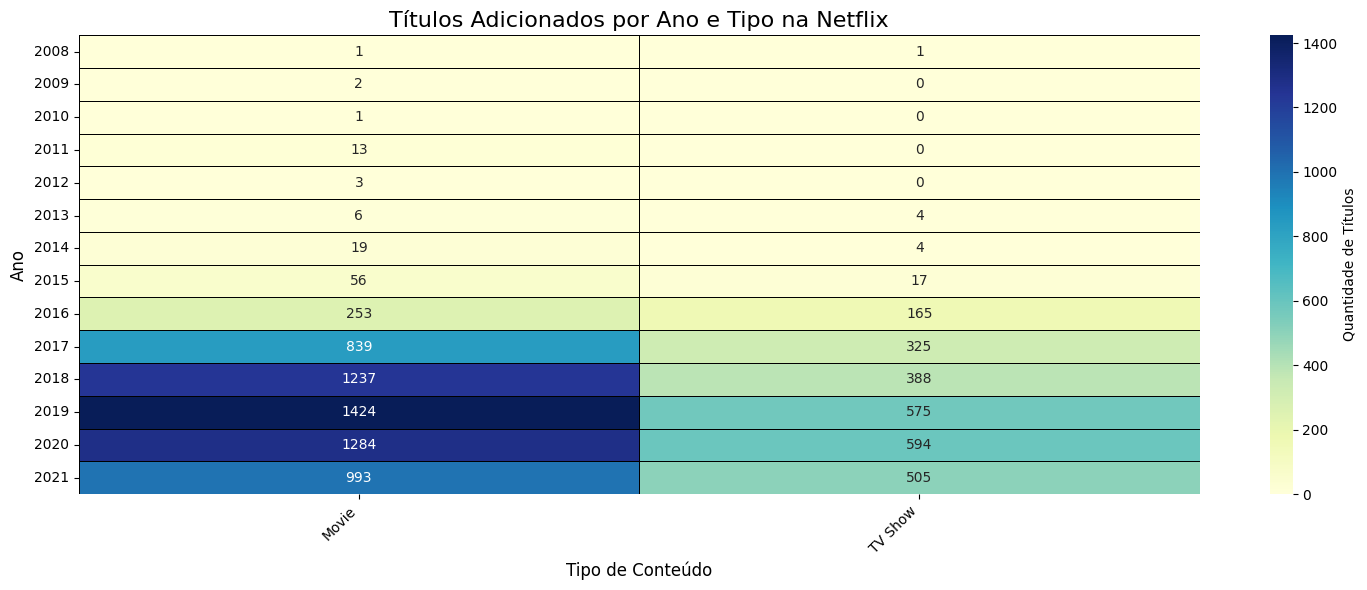

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preenchimento e limpeza
df['type'] = df['type'].fillna('Unknown')
df['year_added'] = df['year_added'].fillna(0).astype(int)

# Tabela dinâmica: Ano vs Tipo
type_year_abs = df.pivot_table(index='year_added', columns='type', values='show_id', aggfunc='count').fillna(0)

# Remover ano 0 se existir
if 0 in type_year_abs.index:
    type_year_abs = type_year_abs.drop(index=0)

# Plot: Heatmap absoluto
plt.figure(figsize=(15, 6))
sns.heatmap(
    type_year_abs,
    annot=True,
    cmap='YlGnBu',
    fmt='.0f',
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Quantidade de Títulos'}
)

plt.title('Títulos Adicionados por Ano e Tipo na Netflix', fontsize=16)
plt.xlabel('Tipo de Conteúdo', fontsize=12)
plt.ylabel('Ano', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Ao analisar a evolução do catálogo da Netflix, observa-se que a plataforma passou por uma expansão intensa a partir de 2016, com um forte aumento no número de títulos adicionados. Apesar da crescente popularidade das séries originais, os dados mostram que os filmes sempre representaram a maior parte do conteúdo disponibilizado. O pico de adições ocorreu entre 2018 e 2019, seguido por uma leve retração nos anos seguintes, o que pode refletir tanto impactos externos, como a pandemia, quanto uma mudança estratégica voltada à curadoria de conteúdo. Ainda assim, nota-se uma tendência de maior inclusão de séries, embora em volume menor do que filmes.

### Relação entre títulos adicionados e diretores (Gráfico de Dispersão)

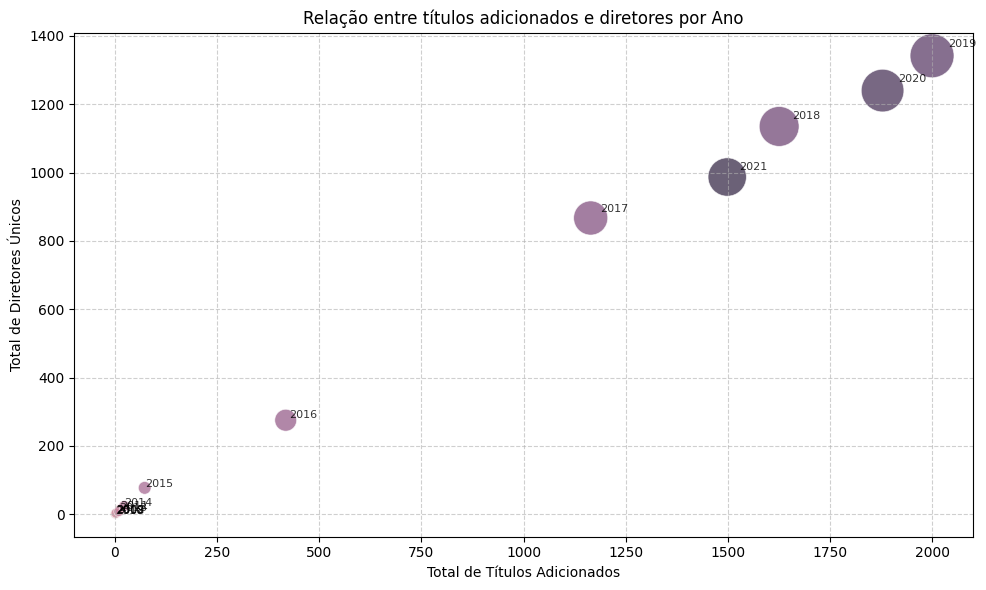

In [11]:
# Substituindo NaN por string vazia
df_cleaned = df.copy()
df_cleaned['director'] = df_cleaned['director'].fillna('')

# Criando um DataFrame para armazenar os dados para o scatter plot
plot_data = []

# Itera sobre cada ano adicionado único
for year in sorted(df_cleaned['year_added'].unique()):
    # Filtrar o DataFrame para o ano atual
    df_year = df_cleaned[df_cleaned['year_added'] == year]

    # Eixo X: Número total de títulos adicionados no ano
    total_titles_in_year = len(df_year)

    # Eixo Y: Número de diretores únicos naquele ano
    # Coletar todos os diretores para o ano, remover strings vazias e contar os únicos
    all_directors_in_year = []
    for director_str in df_year['director']:
        if director_str: # Apenas se a string não estiver vazia
            # Tratar múltiplos diretores por entrada
            directors_list = [d.strip() for d in director_str.split(',')]
            all_directors_in_year.extend(directors_list)

    num_unique_directors_in_year = len(set(all_directors_in_year))

    # Adicionar os dados ao nosso DataFrame para plotagem
    plot_data.append({
        'year_added': year,
        'total_titles_added': total_titles_in_year,
        'num_unique_directors': num_unique_directors_in_year
    })

df_scatter = pd.DataFrame(plot_data)

# Remover anos onde não há diretores ou títulos, se for o caso
df_scatter = df_scatter[df_scatter['num_unique_directors'] > 0]
df_scatter = df_scatter[df_scatter['total_titles_added'] > 0]


# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scatter,
                x='total_titles_added',
                y='num_unique_directors',
                hue='year_added',
                size='total_titles_added',
                sizes=(50, 1000),
                alpha=0.7,
                legend=False)

# Adicionar rótulos para os anos
for i, row in df_scatter.iterrows():
    plt.text(row['total_titles_added'] * 1.02, row['num_unique_directors'] * 1.02,
             str(row['year_added']), fontsize=8, alpha=0.8)

plt.title('Relação entre títulos adicionados e diretores por Ano')
plt.xlabel('Total de Títulos Adicionados')
plt.ylabel('Total de Diretores Únicos')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

A análise revela uma correlação positiva significativa entre o aumento da produção de títulos e o número de diretores distintos ao longo dos anos. Isso sugere que a Netflix não apenas expandiu seu catálogo, mas também ampliou o espaço para diferentes vozes criativas, promovendo uma maior diversidade autoral. O pico de 2019 marca o auge dessa estratégia, com o maior número de títulos e diretores únicos. Assim, podemos inferir que a plataforma adotou uma abordagem consciente de descentralização da autoria, evitando a concentração em poucos nomes e contribuindo para um ambiente mais plural na produção audiovisual.

## Conclusões

O padrão de crescimento da Netflix não foi um aumento gradual e constante. Foi caracterizado por:

* Uma longa fase inicial de pouca atividade.

* Um período curto e intenso de crescimento exponencial e agressivo, onde a empresa inundou a plataforma com conteúdo para dominar o mercado.

* Um pico seguido por uma desaceleração, sugerindo uma maturação da estratégia, com um possível foco maior em produções originais e na curadoria de conteúdo, em vez de apenas no volume.

O aumento de títulos na Netflix não apenas refletiu, mas foi impulsionado por uma maciça e estratégica ampliação na diversidade de países. A empresa usou o conteúdo internacional como motor principal para sua expansão global, uma estratégia que se provou tão bem-sucedida que se tornou um pilar fundamental e permanente de sua operação.

Em todos os anos, o número de filmes adicionados foi maior que o de séries, o que indica que, embora a Netflix produza muitas séries originais, a prioridade em volume foi dada aos filmes.

O número de séries adicionadas cresceu, especialmente entre 2016 e 2019, sugerindo um esforço da Netflix para diversificar os formatos, embora a diferença em relação aos filmes permaneça considerável.

À medida que o número de títulos adicionados aumenta, também cresce o número de diretores únicos. Isso indica que o aumento da produção foi acompanhado por uma ampliação nas vozes criativas envolvidas nas obras.